In [1]:
from utils import *

In [2]:
forecast = pd.read_csv("data/test_forecast_long.csv")
forecast = forecast[forecast['ds'] >= '2021-01-04']
forecast["timestamp"] = forecast["ds"]

cutoff_ts = forecast['ds'].min()

forecast

,ds,yhat,timestamp
72,2021-01-04 00:00:00,24.568160,2021-01-04 00:00:00
73,2021-01-04 01:00:00,23.393322,2021-01-04 01:00:00
74,2021-01-04 02:00:00,21.921172,2021-01-04 02:00:00
75,2021-01-04 03:00:00,21.076043,2021-01-04 03:00:00
76,2021-01-04 04:00:00,22.434293,2021-01-04 04:00:00
...,...,...,...
17515,2022-12-31 19:00:00,53.420872,2022-12-31 19:00:00
17516,2022-12-31 20:00:00,50.855014,2022-12-31 20:00:00
17517,2022-12-31 21:00:00,46.182950,2022-12-31 21:00:00
17518,2022-12-31 22:00:00,41.473853,2022-12-31 22:00:00


In [3]:
# Fetch forwards data for the same date range as the forecast
forwards = get_forwards(
    timestamp=cutoff_ts,
    start=forecast["timestamp"].min(),
    end=forecast["timestamp"].max()
)

forwards

/Users/adrianscholl/LRZ Sync+Share/Projects/price-forward-curve/utils.py:38: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  forwards['TimeStamp'] = pd.to_datetime(forwards['TimeStamp'], errors='coerce')
/Users/adrianscholl/LRZ Sync+Share/Projects/price-forward-curve/utils.py:39: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  forwards['Begin'] = pd.to_datetime(forwards['Begin'], errors='coerce')
/Users/adrianscholl/LRZ Sync+Share/Projects/price-fo

,Identifier,TimeStamp,Begin,End,Open,High,Low,Close,Settlement
21781,D,2021-01-04 00:00:00+01:00,2021-01-04 00:00:00+01:00,2021-01-05 00:00:00+01:00,NaN,NaN,NaN,NaN,48.02
33182,W,2021-01-04 00:00:00+01:00,2021-01-04 00:00:00+01:00,2021-01-11 00:00:00+01:00,NaN,NaN,NaN,NaN,57.70
21782,D,2021-01-04 00:00:00+01:00,2021-01-05 00:00:00+01:00,2021-01-06 00:00:00+01:00,54.50,54.50,53.50,54.00,55.34
21783,D,2021-01-04 00:00:00+01:00,2021-01-06 00:00:00+01:00,2021-01-07 00:00:00+01:00,58.00,58.00,54.00,54.00,56.03
21784,D,2021-01-04 00:00:00+01:00,2021-01-07 00:00:00+01:00,2021-01-08 00:00:00+01:00,69.25,69.25,68.00,68.00,69.25
21785,D,2021-01-04 00:00:00+01:00,2021-01-08 00:00:00+01:00,2021-01-09 00:00:00+01:00,69.50,69.50,69.50,69.50,71.38
1,WE,2021-01-04 00:00:00+01:00,2021-01-09 00:00:00+01:00,2021-01-11 00:00:00+01:00,51.00,52.25,51.00,52.00,51.95
21786,D,2021-01-04 00:00:00+01:00,2021-01-09 00:00:00+01:00,2021-01-10 00:00:00+01:00,NaN,NaN,NaN,NaN,55.31
21787,D,2021-01-04 00:00:00+01:00,2021-01-10 00:00:00+01:00,2021-01-11 00:00:00+01:00,NaN,NaN,NaN,NaN,48.59
33183,W,2021-01-04 00:00:00+01:00,2021-01-11 00:00:00+01:00,2021-01-18 00:00:00+01:00,50.50,53.05,50.50,52.30,52.70


In [4]:
t, F = partition_forwards(forwards, pd.to_datetime(cutoff_ts, utc=True)-pd.Timedelta(1, 'h'))

In [5]:
# Construct matrices
H = construct_H(t)

In [6]:
s_t = np.array(forecast["yhat"])
A, b = construct_A_and_b(t, F, s_t)

A.shape, b.shape

0 24
0 168
24 48
48 72
72 96
96 120
120 168
120 144
144 168
168 336
336 504
504 672
672 840
672 1344
1344 2087
2087 2807
2087 4271
2807 3551
3551 4271
4271 6479
4271 5015
5015 5759
5759 6479
6479 7224
6479 8688
8688 17448
8688 10847
10847 13031
13031 15239
15239 17448


((103, 125), (103,))

In [7]:
n = len(t)-1
m = len(F)

3*(n-1)+1+m

103

In [8]:
# Solve the system
x, lam = solve_linear_system(H, A, b)

# Results
print("Solution x:", x)
print("Lagrange multipliers λ:", lam)

Solution x: [ 2.28073060e-16  5.47481159e-17  1.34386208e-15  1.25841383e-15
 -1.72115096e-17  9.06969321e-10  1.14289211e-11  9.87965056e-14
  5.26349239e-18 -1.23874065e-19  1.34117976e-10  1.07656404e-12
  5.84137631e-15 -4.48442026e-19 -5.00272225e-18  3.91421223e-11
  2.30400455e-13  9.45643399e-16  3.88175196e-18  1.27344182e-16
  1.47132642e-11  7.36394114e-14  1.42436921e-15  6.17134142e-14
  3.37616716e-14  7.75386000e-12  3.54626336e-14  1.53539164e-16
  2.50247435e-18 -9.13462853e-18  3.84630989e-12 -2.40167076e-13
 -2.58660526e-15 -2.15858093e-17  6.36709768e-18  9.45378173e-10
  1.47290992e-07  9.12425269e-10  4.20119858e-12  1.66710271e-14
  8.89232151e-11  8.52042739e-09  3.29521361e-11  9.28908228e-14
  2.20688363e-16 -7.26113566e-11  8.76859344e-08  2.44298481e-10
  4.93913472e-13  8.39813838e-16 -4.57836133e-11  7.03533295e-08
  1.53480173e-10  2.42243426e-13  3.20178295e-16 -1.13817643e-11
  2.65443200e-08  3.88039129e-11  4.16376014e-14  3.81488981e-17
 -1.73320560e

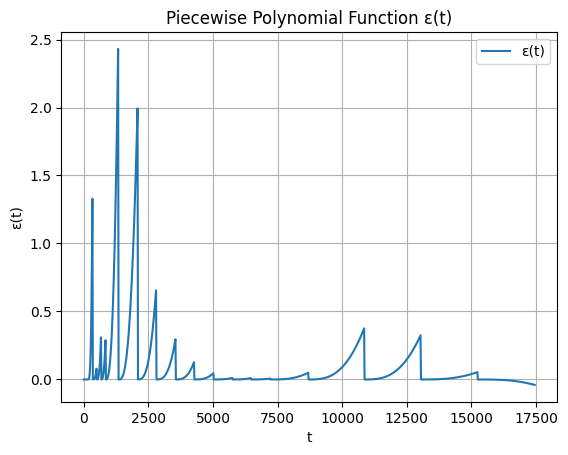

In [14]:
# Construct ε(t)
epsilon = construct_epsilon(x, t)

# Plot ε(t)
t_plot = np.linspace(t[0], t[-1], 1000)
plt.plot(t_plot, epsilon(t_plot), label="ε(t)")
plt.xlabel("t")
plt.ylabel("ε(t)")
plt.title("Piecewise Polynomial Function ε(t)")
plt.legend()
plt.grid()
plt.show()

<Axes: >

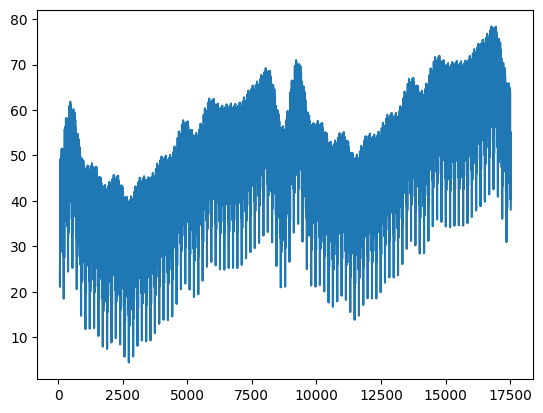

In [10]:
corrected_forecast = forecast.copy()
corrected_forecast["yhat"].plot()

<Axes: >

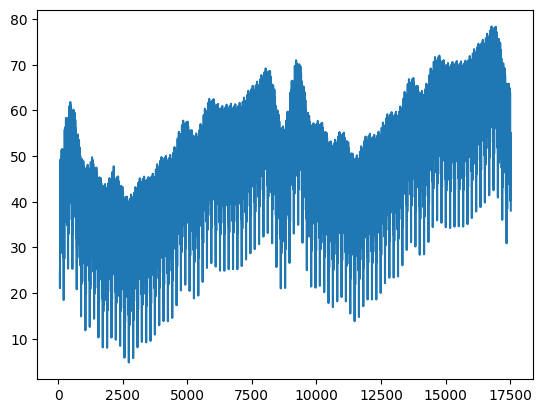

In [11]:
eps = np.array([epsilon(idx) for idx, _ in enumerate(corrected_forecast["timestamp"])])
corrected_forecast["yhat"] = corrected_forecast["yhat"] + eps
corrected_forecast["yhat"].plot()

In [12]:
fig = plot_forecast_forwards(cutoff_ts, corrected_forecast)

# Plot the initial forecast as a grey line if provided
fig.add_trace(go.Scatter(
    x=forecast['timestamp'],
    y=forecast['yhat'],
    mode='lines',
    name='Initial Forecast',
    line=dict(color='grey', dash='dot')
))
fig.show()

/Users/adrianscholl/LRZ Sync+Share/Projects/price-forward-curve/utils.py:38: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  forwards['TimeStamp'] = pd.to_datetime(forwards['TimeStamp'], errors='coerce')
/Users/adrianscholl/LRZ Sync+Share/Projects/price-forward-curve/utils.py:39: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  forwards['Begin'] = pd.to_datetime(forwards['Begin'], errors='coerce')
/Users/adrianscholl/LRZ Sync+Share/Projects/price-fo